In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv("diabetes.csv", encoding="utf-8")
print(f"dataset: {dataset.shape}")

dataset: (768, 9)


In [6]:
dataset.head()
# prgnancies: 임신횟수/ Glucose: 공복 혈중수치/ BloodPressure: 혈압 수치/SkinThickness: 피부 두께
# Insulin: 혈중 인슐린 농도/BMI: 체질량지수/DiabetesPedigreeFunction: 당뇨 내력 함수/

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.isnull().sum()
# 결측치 없음//인데 밑에 표 보니까 0에 값이 있는 경우가 있음.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

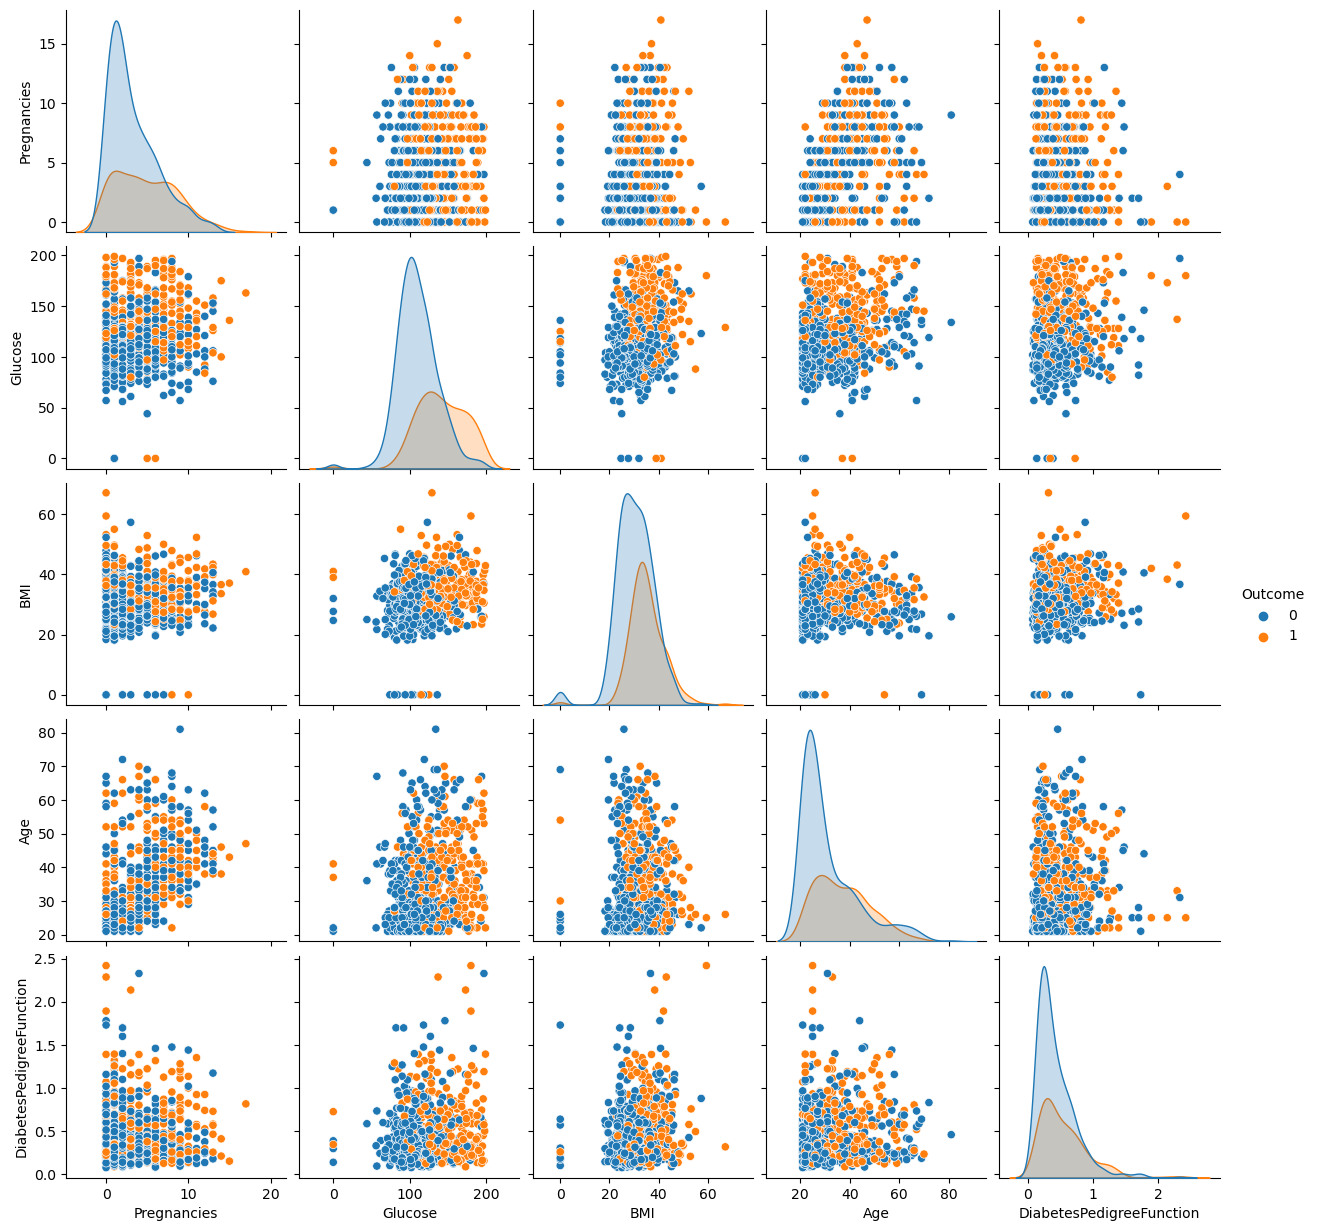

In [9]:
sns.pairplot(dataset, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'])
plt.show()

# Glucose, BMI: 0에 가까운 값이 보임. 
# DiabetesPedigreeFunction: 2 이상인 값이 수상함.

In [10]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = dataset['Glucose'].count()
for feature in zero_features:
    zero_count = dataset[dataset[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


## 결측치 처리

In [11]:
# 임신 15회 이상 값 삭제
dataset = dataset[dataset['Pregnancies'] < 15]

# Glucose와 BMI에서 0에 가까운 값을 결측치로 처리하고 Age 기준으로 결측치 채움
columns_to_fill = ['Glucose', 'BMI']

for col in columns_to_fill:
    # 0에 가까운 값을 결측치로 변환
    dataset[col] = dataset[col].replace(0, np.nan)
    # Age를 기준으로 중앙값으로 결측치 대체
    dataset[col].fillna(dataset.groupby('Age')[col].transform('median'), inplace=True)
    
# 데이터프레임에서 0 값을 평균값으로 대체
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mean())
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].mean())

# DiabetesPedigreeFunction에서 2 이상의 값 제거
dataset = dataset[dataset['DiabetesPedigreeFunction'] < 2]


for feature in zero_features:
    zero_count = dataset[dataset[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


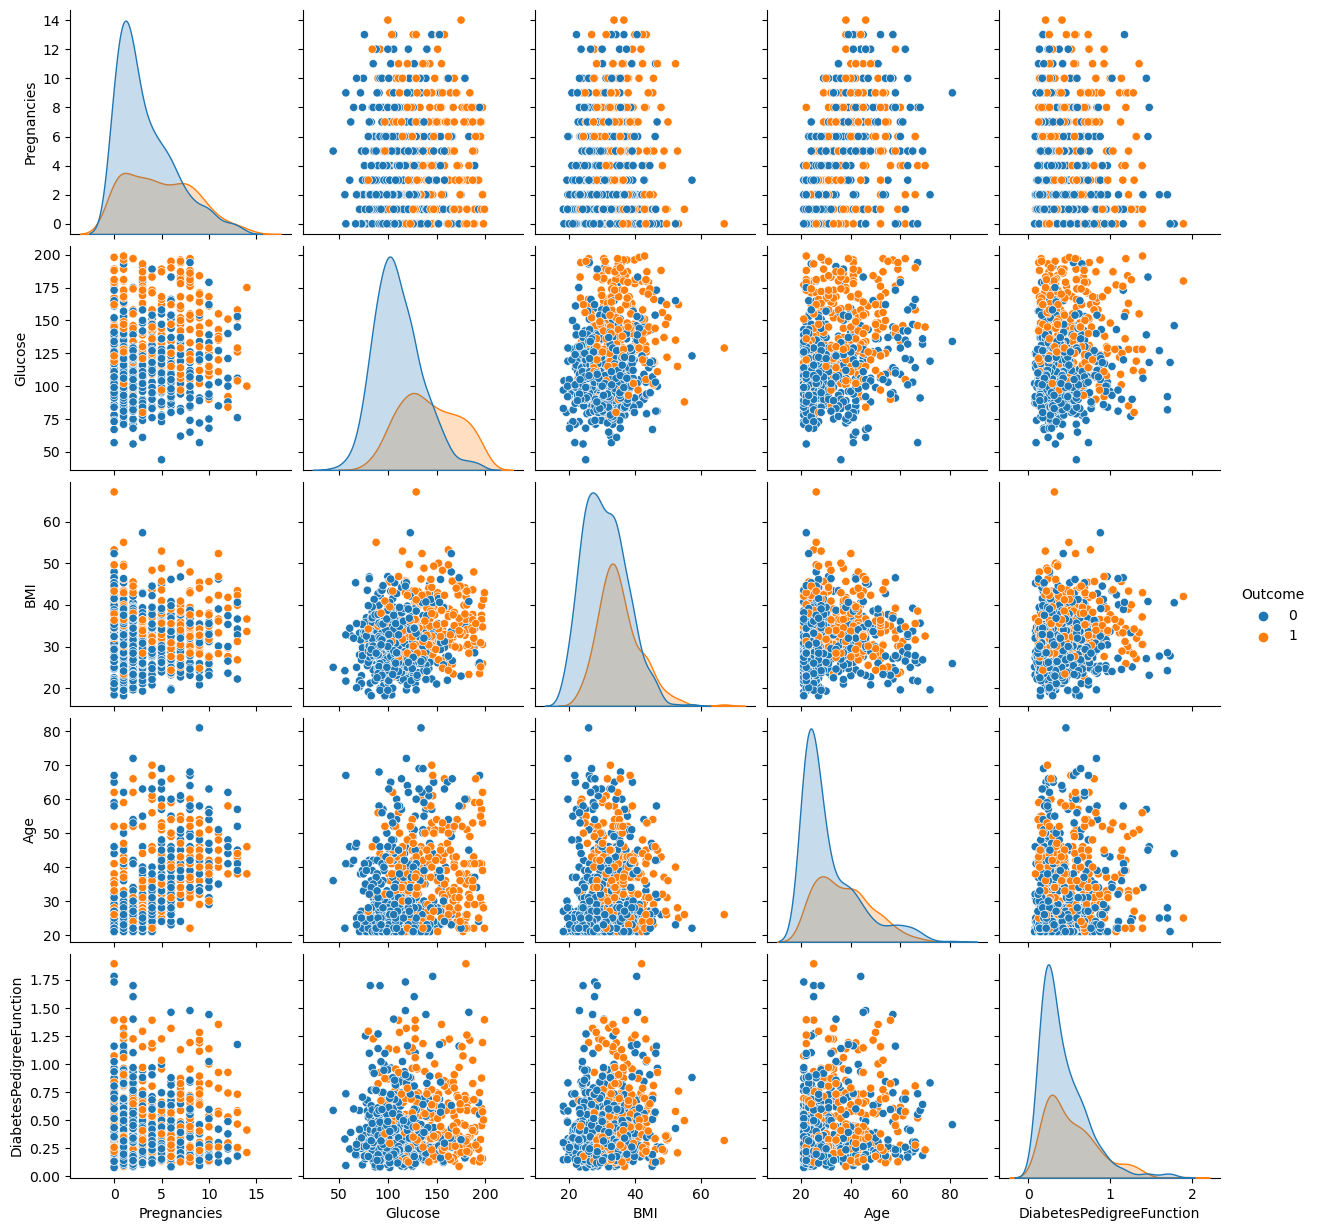

In [12]:
sns.pairplot(dataset, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'])
plt.show()

## 정규화

In [13]:
# 데이터셋 각 열의 범위 확인
# 데이터가 양수, 범위가 고정되어야 하는 경우 적합한 정규화 선택함./표준화

cols = dataset.columns
for col in cols:
    print(f"{col}: {dataset[col].min()} / {dataset[col].max()}")

Pregnancies: 0 / 14
Glucose: 44.0 / 199.0
BloodPressure: 24.0 / 122.0
SkinThickness: 7.0 / 99.0
Insulin: 15.0 / 846.0
BMI: 18.2 / 67.1
DiabetesPedigreeFunction: 0.078 / 1.893
Age: 21 / 81
Outcome: 0 / 1


In [14]:
from sklearn.preprocessing import MinMaxScaler
# 스케일러 객체 생성
scaler = MinMaxScaler()

# 정규화할 열 선택/모든 열을 정규화하려면 data.values를 사용할 수 있음
scaled_data = scaler.fit_transform(dataset)

# 정규화된 데이터프레임 생성
normalized_df = pd.DataFrame(scaled_data, columns=dataset.columns)

# 정규화된 데이터 확인
print(normalized_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.428571  0.670968       0.489796       0.304348  0.077877  0.314928   
1     0.071429  0.264516       0.428571       0.239130  0.077877  0.171779   
2     0.571429  0.896774       0.408163       0.146682  0.077877  0.104294   
3     0.071429  0.290323       0.428571       0.173913  0.095066  0.202454   
4     0.357143  0.464516       0.510204       0.146682  0.077877  0.151329   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.302479  0.483333      1.0  
1                  0.150413  0.166667      0.0  
2                  0.327273  0.183333      1.0  
3                  0.049036  0.000000      0.0  
4                  0.067769  0.150000      0.0  


## 데이터 분할: 훈련데이터(80%), 테스트데이터(20%)

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome', axis=1)  # 입력 특징
y = dataset['Outcome']               # 레이블

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"훈련 데이터 개수: {X_train.shape[0]}개")
print(f"테스트 데이터 개수: {X_test.shape[0]}개")


훈련 데이터 개수: 609개
테스트 데이터 개수: 153개


## 모델 훈련: Logistic Regression, Decision Tree, Random Forest

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Logistic Regression

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, y_train) # 훈련
y_pred_logistic = logistic_model.predict(X_test) # 예측
y_scores_logistic = logistic_model.predict_proba(X_test)[:, 1] # 예측 확률

In [18]:
# Decision Tree

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
y_scores_tree = decision_tree_model.predict_proba(X_test)[:, 1]

In [19]:
#Random Forest

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
y_scores_forest = random_forest_model.predict_proba(X_test)[:, 1]

## 평가지표

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

def evaluate_model(y_true, y_pred, y_scores, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    print(f"{model_name} 성능:")
    print(f"정확도: {accuracy:.4f}")
    print(f"정밀도: {report['1']['precision']:.4f}")
    print(f"재현율: {report['1']['recall']:.4f}")
    print(f"F1-스코어: {report['1']['f1-score']:.4f}")
    print("혼동 행렬:\n", cm)
    print(f"AUC: {roc_auc:.4f}")
    print()


In [21]:
evaluate_model(y_test, y_pred_logistic, y_scores_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, y_scores_tree, "Decision Tree")
evaluate_model(y_test, y_pred_forest, y_scores_forest, "Random Forest")


Logistic Regression 성능:
정확도: 0.7778
정밀도: 0.7347
재현율: 0.6316
F1-스코어: 0.6792
혼동 행렬:
 [[83 13]
 [21 36]]
AUC: 0.8240

Decision Tree 성능:
정확도: 0.6863
정밀도: 0.5818
재현율: 0.5614
F1-스코어: 0.5714
혼동 행렬:
 [[73 23]
 [25 32]]
AUC: 0.6609

Random Forest 성능:
정확도: 0.7320
정밀도: 0.6538
재현율: 0.5965
F1-스코어: 0.6239
혼동 행렬:
 [[78 18]
 [23 34]]
AUC: 0.8353



In [26]:
# 오차 행렬 시각화
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

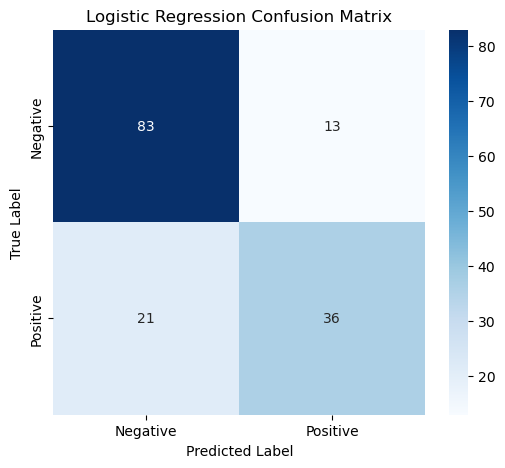

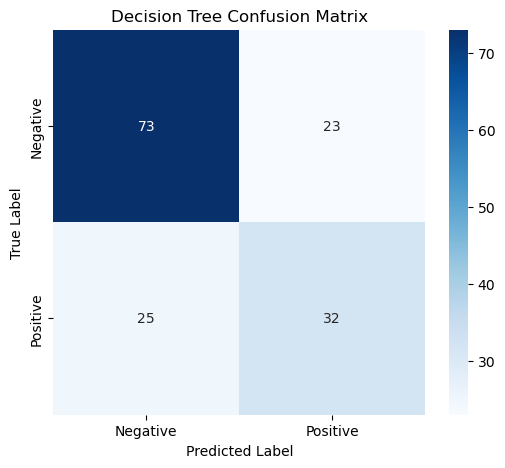

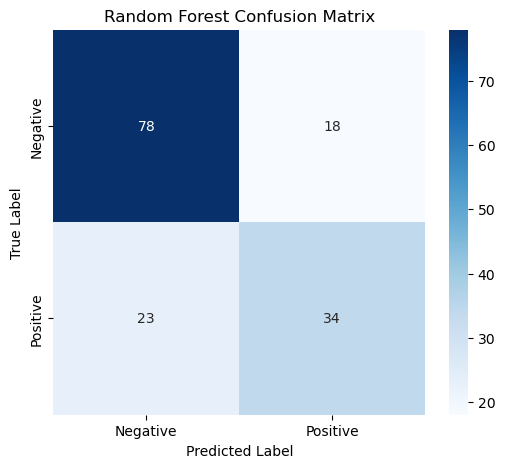

In [27]:
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")

In [28]:
# ROC 곡선 그리기
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

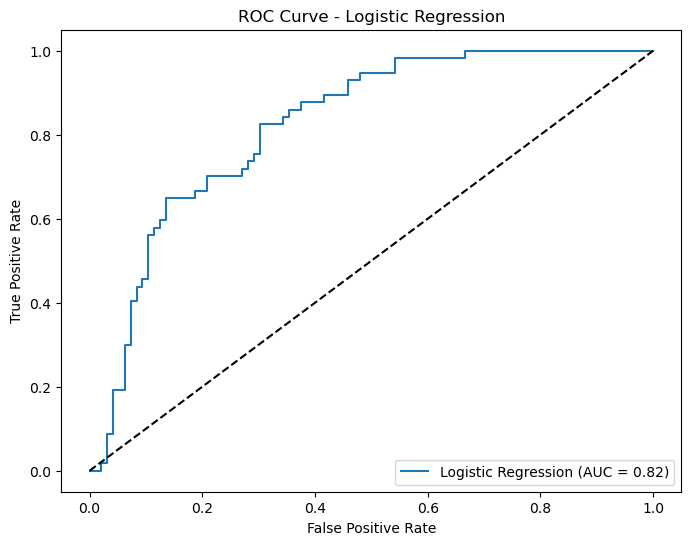

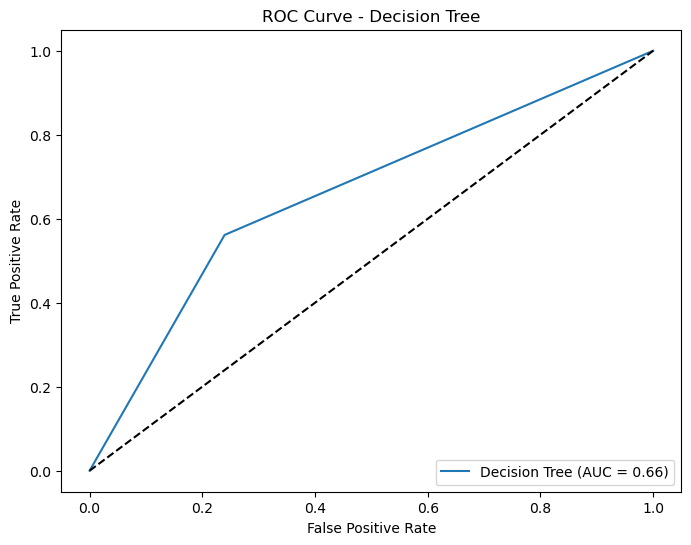

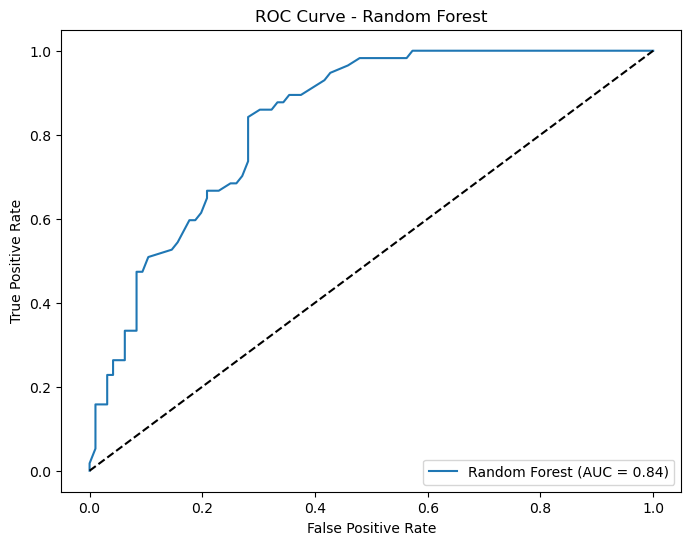

In [29]:
plot_roc_curve(y_test, y_scores_logistic, "Logistic Regression")
plot_roc_curve(y_test, y_scores_tree, "Decision Tree")
plot_roc_curve(y_test, y_scores_forest, "Random Forest")